In [13]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 9.4 MB/s 
     |████████████████████████████████| 17.0 MB 66.9 MB/s 
     |████████████████████████████████| 2.0 MB 53.7 MB/s 
     |████████████████████████████████| 262 kB 100.7 MB/s 
     |████████████████████████████████| 6.8 MB 50.3 MB/s 
     |████████████████████████████████| 134 kB 83.3 MB/s 
     |████████████████████████████████| 10.4 MB 19.7 MB/s 
     |████████████████████████████████| 25.9 MB 1.4 MB/s 
     |████████████████████████████████| 1.3 MB 74.7 MB/s 
     |████████████████████████████████| 636 kB 63.2 MB/s 
     |████████████████████████████████| 3.3 MB 55.7 MB/s 
     |████████████████████████████████| 56 kB 2.0 MB/s 
     |████████████████████████████████| 167 kB 59.8 MB/s 
     |████████████████████████████████| 88 kB 10.2 MB/s 
     |████████████████████████████████| 1.7 MB 63.5 MB/s 
  Installing build dependencies 

In [5]:
!pip install Jinja2
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.


In [36]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [37]:
import pandas as pd

dataset = pd.read_csv('heart.csv')
dataset.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [38]:
data = dataset.sample(frac = 0.95, random_state = 786)
data.index
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop= True)
print('Data for Modeling:' + str(data.shape) )
print('Unseen Data for Predictions:' + str(data_unseen.shape))

Data for Modeling:(288, 14)
Unseen Data for Predictions:(15, 14)


# Setup Env

In [39]:
from pycaret.classification import *

cli = setup(data = data, target = 'output', session_id = 255,
                  normalize = True, 
                  transformation = True, 
                  ignore_low_variance = True,
                  remove_multicollinearity = True, multicollinearity_threshold = 0.95,
                  bin_numeric_features = ['age'],
                  log_experiment = True, experiment_name = 'stroke1') 

,Description,Value
0,session_id,255
1,Target,output
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(288, 14)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:Logging experiment in MLFlow
INFO:logs:SubProcess save_model() called ==================================
INFO:logs:Initializing save_model()
INFO:logs:save_model(model=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='output',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strat...
                ('dummy', Dummify(target='output')),
                ('fix_perfect', Remove_100(target='outpu

In [40]:
top3 = compare_models(n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8310,0.9100,0.8582,0.8312,0.8414,0.6579,0.6640,0.015
ridge,Ridge Classifier,0.8262,0.0000,0.8782,0.8165,0.8433,0.6471,0.6557,0.010
lda,Linear Discriminant Analysis,0.8212,0.8980,0.8600,0.8173,0.8359,0.6382,0.6442,0.011
knn,K Neighbors Classifier,0.8062,0.8681,0.8391,0.8168,0.8220,0.6082,0.6180,0.112
svm,SVM - Linear Kernel,0.8007,0.0000,0.7909,0.8380,0.8045,0.5976,0.6137,0.013
et,Extra Trees Classifier,0.7910,0.8877,0.8091,0.7990,0.8004,0.5771,0.5820,0.393
rf,Random Forest Classifier,0.7862,0.8915,0.8291,0.7897,0.8039,0.5672,0.5767,0.447
ada,Ada Boost Classifier,0.7810,0.8311,0.8291,0.7750,0.7977,0.5576,0.5661,0.065
lightgbm,Light Gradient Boosting Machine,0.7810,0.8724,0.7818,0.8097,0.7891,0.5588,0.5675,0.021
gbc,Gradient Boosting Classifier,0.7610,0.8338,0.7809,0.7699,0.7737,0.5179,0.5211,0.060


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=255, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=255, solver='auto',
                tol=0.001), LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)]
INFO:logs:compare_models() succesfully completed......................................


In [41]:
nb = create_model('nb', fold = 5, round = 2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.71,0.84,0.55,0.86,0.67,0.43,0.46
1,0.70,0.75,0.81,0.68,0.74,0.39,0.40
2,0.82,0.90,1.00,0.75,0.86,0.64,0.69
3,0.88,0.94,1.00,0.81,0.89,0.75,0.77
4,0.70,0.74,0.86,0.68,0.76,0.38,0.39
Mean,0.76,0.84,0.84,0.75,0.78,0.52,0.54
Std,0.07,0.08,0.17,0.07,0.08,0.15,0.16


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:GaussianNB(priors=None, var_smoothing=1e-09)
INFO:logs:create_model() succesfully completed......................................


In [43]:
tune_nb = tune_model(nb, optimize = 'Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8095,0.9000,0.8182,0.8182,0.8182,0.6182,0.6182
1,0.8500,0.8800,1.0000,0.7692,0.8696,0.7000,0.7338
2,0.8000,0.7400,0.7000,0.8750,0.7778,0.6000,0.6124
3,0.8000,0.8400,0.8000,0.8000,0.8000,0.6000,0.6000
4,0.8000,0.8990,0.8182,0.8182,0.8182,0.5960,0.5960
5,0.9000,0.8889,1.0000,0.8462,0.9167,0.7938,0.8112
6,0.8500,0.9596,0.8182,0.9000,0.8571,0.7000,0.7035
7,0.9000,0.9495,0.9091,0.9091,0.9091,0.7980,0.7980
8,0.6500,0.6414,0.8182,0.6429,0.7200,0.2708,0.2851


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:GaussianNB(priors=None, var_smoothing=0.01)
INFO:logs:tune_model() succesfully completed......................................


In [44]:
plot_model(tune_nb, plot = 'parameter')

,Parameters
priors,None
var_smoothing,0.01


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


# Ensemble a model

In [45]:
nb = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7143,0.8636,0.9091,0.6667,0.7692,0.4167,0.4523
1,0.5000,0.7900,0.2000,0.5000,0.2857,0.0000,0.0000
2,0.5500,0.7450,0.8000,0.5333,0.6400,0.1000,0.1155
3,0.6500,0.8500,0.9000,0.6000,0.7200,0.3000,0.3464
4,0.9000,0.8990,1.0000,0.8462,0.9167,0.7938,0.8112
5,0.7500,0.8889,1.0000,0.6875,0.8148,0.4681,0.5528
6,0.8500,0.9596,1.0000,0.7857,0.8800,0.6875,0.7237
7,0.9000,0.9293,1.0000,0.8462,0.9167,0.7938,0.8112
8,0.6000,0.6414,0.8182,0.6000,0.6923,0.1579,0.1741


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:GaussianNB(priors=None, var_smoothing=1e-09)
INFO:logs:create_model() succesfully completed......................................


In [46]:
bagged_nb = ensemble_model(nb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8095,0.9091,0.8182,0.8182,0.8182,0.6182,0.6182
1,0.6500,0.8000,0.5000,0.7143,0.5882,0.3000,0.3145
2,0.5500,0.6950,0.6000,0.5455,0.5714,0.1000,0.1005
3,0.8000,0.8500,0.9000,0.7500,0.8182,0.6000,0.6124
4,0.8000,0.8586,0.8182,0.8182,0.8182,0.5960,0.5960
5,0.8000,0.8889,1.0000,0.7333,0.8462,0.5789,0.6383
6,0.9000,0.9495,0.9091,0.9091,0.9091,0.7980,0.7980
7,0.9000,0.9293,1.0000,0.8462,0.9167,0.7938,0.8112
8,0.6000,0.6970,0.8182,0.6000,0.6923,0.1579,0.1741


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:BaggingClassifier(base_estimator=GaussianNB(priors=None, var_smoothing=1e-09),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=255, verbose=0,
                  warm_start=False)
INFO:logs:ensemble_model() succesfully completed......................................


In [47]:
print(bagged_nb)

BaggingClassifier(base_estimator=GaussianNB(priors=None, var_smoothing=1e-09),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=255, verbose=0,
                  warm_start=False)


In [49]:
boosted_nb = ensemble_model(nb, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5238,0.9364,0.0909,1.0000,0.1667,0.0870,0.2132
1,0.5000,0.5150,0.9000,0.5000,0.6429,0.0000,0.0000
2,0.5500,0.7600,0.2000,0.6667,0.3077,0.1000,0.1400
3,0.5000,0.8200,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.6500,0.8586,0.9091,0.6250,0.7407,0.2553,0.3015
5,0.5000,0.8889,0.0909,1.0000,0.1667,0.0826,0.2075
6,0.6500,0.9596,1.0000,0.6111,0.7586,0.2391,0.3685
7,0.8000,0.8990,0.8182,0.8182,0.8182,0.5960,0.5960
8,0.6000,0.6818,0.3636,0.8000,0.5000,0.2381,0.2901


INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 9
INFO:logs:AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=GaussianNB(priors=None, var_smoothing=1e-09),
                   learning_rate=1.0, n_estimators=10, random_state=255)
INFO:logs:ensemble_model() succesfully completed......................................


In [50]:
bagged_nb2 = ensemble_model(nb, n_estimators=50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8095,0.8636,0.8182,0.8182,0.8182,0.6182,0.6182
1,0.7000,0.8800,0.5000,0.8333,0.6250,0.4000,0.4364
2,0.5500,0.6850,0.7000,0.5385,0.6087,0.1000,0.1048
3,0.8000,0.8500,0.9000,0.7500,0.8182,0.6000,0.6124
4,0.8000,0.8990,0.8182,0.8182,0.8182,0.5960,0.5960
5,0.8500,0.9091,1.0000,0.7857,0.8800,0.6875,0.7237
6,0.8500,0.9697,0.8182,0.9000,0.8571,0.7000,0.7035
7,0.9000,0.9495,1.0000,0.8462,0.9167,0.7938,0.8112
8,0.6000,0.6263,0.8182,0.6000,0.6923,0.1579,0.1741


INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 10
INFO:logs:BaggingClassifier(base_estimator=GaussianNB(priors=None, var_smoothing=1e-09),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=50, n_jobs=None,
                  oob_score=False, random_state=255, verbose=0,
                  warm_start=False)
INFO:logs:ensemble_model() succesfully completed......................................


In [51]:
# train individual models to blend
lightgbm = create_model('lightgbm', verbose = False)
nb = create_model('nb', verbose = False)
lr = create_model('lr', verbose = False)


INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=lightgbm, fold=None, round=4, cross_validation=True, predict=True, fit_kwargs=None, groups=None, refit=True, verbose=False, system=True, metrics=None, experiment_custom_tags=None, add_to_model_list=True, probability_threshold=None, display=None, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Light Gradient Boosting Machine Imported succesfully
INFO:logs:Starting cross validation
INFO:logs:Cross validating with StratifiedKFold(n_splits=10, random_state=None, shuffle=False), n_jobs=-1
INFO:logs:Calculating mean and std
INFO:logs:Creating metrics dataframe
INFO:logs:Finalizing model
INFO:logs:Creating Dashboard logs
INFO:logs:Model: Light Gradient Boosting Machine
INFO:logs:logged params: {'boosting_type': 'gbdt', 'class_weight':

In [52]:
blend_soft = blend_models(estimator_list = [lightgbm, nb, lr], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7619,0.8909,0.9091,0.7143,0.8000,0.5161,0.5394
1,0.8000,0.8300,0.6000,1.0000,0.7500,0.6000,0.6547
2,0.8000,0.7500,0.7000,0.8750,0.7778,0.6000,0.6124
3,0.8000,0.8800,0.9000,0.7500,0.8182,0.6000,0.6124
4,0.8500,0.9394,0.9091,0.8333,0.8696,0.6939,0.6975
5,0.8000,0.9192,1.0000,0.7333,0.8462,0.5789,0.6383
6,0.9000,0.9495,0.9091,0.9091,0.9091,0.7980,0.7980
7,0.8500,0.9798,0.9091,0.8333,0.8696,0.6939,0.6975
8,0.6500,0.7374,0.8182,0.6429,0.7200,0.2708,0.2851


INFO:logs:create_model_container: 26
INFO:logs:master_model_container: 26
INFO:logs:display_container: 14
INFO:logs:VotingClassifier(estimators=[('lightgbm',
                              LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             num_leaves=31, objective=None,
                                             random_state=255, reg_alpha=0.0,
                                             reg_lambda=0.0, silent

In [53]:
blender_top3 = blend_models(top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7619,0.0,0.8182,0.7500,0.7826,0.5205,0.5230
1,0.8500,0.0,1.0000,0.7692,0.8696,0.7000,0.7338
2,0.8500,0.0,0.8000,0.8889,0.8421,0.7000,0.7035
3,0.8500,0.0,0.8000,0.8889,0.8421,0.7000,0.7035
4,0.8000,0.0,0.8182,0.8182,0.8182,0.5960,0.5960
5,0.9000,0.0,1.0000,0.8462,0.9167,0.7938,0.8112
6,0.9000,0.0,0.9091,0.9091,0.9091,0.7980,0.7980
7,0.8000,0.0,0.9091,0.7692,0.8333,0.5876,0.6005
8,0.7000,0.0,0.8182,0.6923,0.7500,0.3814,0.3898


INFO:logs:create_model_container: 27
INFO:logs:master_model_container: 27
INFO:logs:display_container: 15
INFO:logs:VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=1000,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=255,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('ridge',
                              RidgeClassifier(alpha=1.0, class_weight=None,
                                              copy_X=True, 

In [54]:
print(blender_top3.estimators_)

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=255, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=255, solver='auto',
                tol=0.001), LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)]


In [55]:
stack_soft = stack_models(top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8095,0.9455,0.9091,0.7692,0.8333,0.6147,0.6264
1,0.8000,1.0000,1.0000,0.7143,0.8333,0.6000,0.6547
2,0.8000,0.8600,0.7000,0.8750,0.7778,0.6000,0.6124
3,0.7500,0.8200,0.7000,0.7778,0.7368,0.5000,0.5025
4,0.8000,0.9293,0.8182,0.8182,0.8182,0.5960,0.5960
5,0.9000,0.9192,1.0000,0.8462,0.9167,0.7938,0.8112
6,0.9000,0.9394,0.9091,0.9091,0.9091,0.7980,0.7980
7,0.9000,0.9495,0.9091,0.9091,0.9091,0.7980,0.7980
8,0.7000,0.7677,0.8182,0.6923,0.7500,0.3814,0.3898


INFO:logs:create_model_container: 28
INFO:logs:master_model_container: 28
INFO:logs:display_container: 16
INFO:logs:StackingClassifier(cv=5,
                   estimators=[('lr',
                                LogisticRegression(C=1.0, class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=None, max_iter=1000,
                                                   multi_class='auto',
                                                   n_jobs=None, penalty='l2',
                                                   random_state=255,
                                                   solver='lbfgs', tol=0.0001,
                                                   verbose=0,
                                                   warm_start=False)),
                           

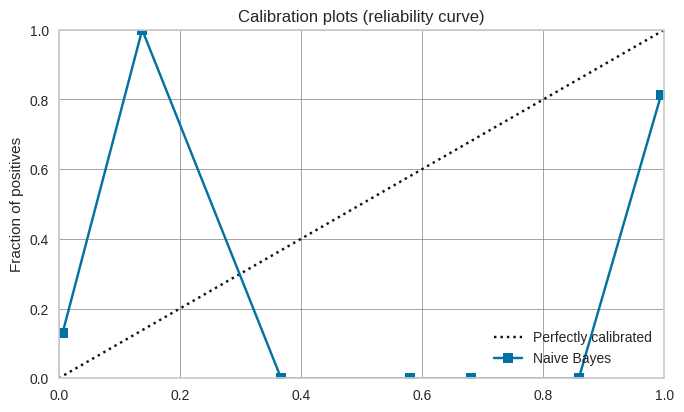

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [57]:
plot_model(nb, plot='calibration')

In [58]:
calibrated_nb_isotonic = calibrate_model(nb, method = 'isotonic')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7619,0.8909,0.8182,0.7500,0.7826,0.5205,0.5230
1,0.7000,0.8950,1.0000,0.6250,0.7692,0.4000,0.5000
2,0.8000,0.7450,0.7000,0.8750,0.7778,0.6000,0.6124
3,0.8000,0.8500,0.8000,0.8000,0.8000,0.6000,0.6000
4,0.8000,0.8838,0.8182,0.8182,0.8182,0.5960,0.5960
5,0.9000,0.8889,1.0000,0.8462,0.9167,0.7938,0.8112
6,0.8500,0.9596,0.8182,0.9000,0.8571,0.7000,0.7035
7,0.9000,0.9394,0.9091,0.9091,0.9091,0.7980,0.7980
8,0.6500,0.6414,0.8182,0.6429,0.7200,0.2708,0.2851


INFO:logs:create_model_container: 29
INFO:logs:master_model_container: 29
INFO:logs:display_container: 17
INFO:logs:CalibratedClassifierCV(base_estimator=GaussianNB(priors=None,
                                                 var_smoothing=1e-09),
                       cv=5, method='isotonic')
INFO:logs:calibrate_model() succesfully completed......................................


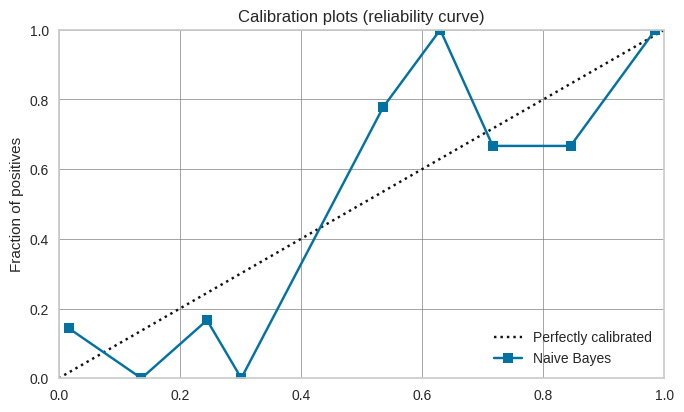

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [59]:
plot_model(calibrated_nb_isotonic, plot='calibration')